In [2]:
# Import Libraries 
library(tidyverse)

In [3]:
# Documenting Steps for Downloading Data Files

# Salary file
#python download_data.py --url=https://github.com/invinst/chicago-police-data/blob/master/data/unified_data/salary/salary-ranks_2002-2017_2017-09.csv.gz?raw=true --path=../data/salary.csv

# Accused file
#python download_data.py --url=https://github.com/invinst/chicago-police-data/blob/master/data/unified_data/complaints/complaints-accused.csv.gz?raw=true --path=../data/accused.csv

# Complaints file
#python download_data.py --url=https://github.com/invinst/chicago-police-data/blob/master/data/unified_data/complaints/complaints-complaints.csv.gz?raw=true --path=../data/complaints.csv

In [4]:
# Load csv files
accused_df <- read_csv("../data/accused.csv", col_types = cols())
complaints_df <- read_csv("../data/complaints.csv", col_types = cols())
salary_df <- read_csv("../data/salary.csv", col_types = cols())


Warning message:
“243639 parsing failures.
   row          col           expected          actual                  file
117845 recc_finding 1/0/T/F/TRUE/FALSE NS              '../data/accused.csv'
117845 recc_outcome 1/0/T/F/TRUE/FALSE No Action Taken '../data/accused.csv'
117846 recc_finding 1/0/T/F/TRUE/FALSE UN              '../data/accused.csv'
117846 recc_outcome 1/0/T/F/TRUE/FALSE No Action Taken '../data/accused.csv'
117847 recc_finding 1/0/T/F/TRUE/FALSE UN              '../data/accused.csv'
...... ............ .................. ............... .....................
See problems(...) for more details.
”
Warning message:
“137838 parsing failures.
   row          col               expected                actual                     file
 71555 beat         no trailing characters 31 0                  '../data/complaints.csv'
 73291 beat         no trailing characters 31 0                  '../data/complaints.csv'
 80258 beat         no trailing characters 17 1                  '.

In [5]:
# See first few rows of DFs
head(accused_df)
head(complaints_df)
head(salary_df)

UID,complaint_category,complaint_code,cr_id,cv,final_finding,final_outcome,recc_finding,recc_outcome,link_UID
<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<lgl>,<lgl>,<dbl>
130469,SUPERVISOR RESPONSIBILITY: FAIL TO OBTAIN COMPLAINT REGISTER NO.,12D,C170981,1,NS,NO ACTION TAKEN,NA,NA,20040
103495,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NA,NA,7727
111845,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NA,NA,17149
126148,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NA,NA,271
127906,EXCESSIVE FORCE: ARRESTEE - DURING ARREST,05A,C170981,1,NS,NO ACTION TAKEN,NA,NA,11004
117100,EXCESSIVE FORCE: NO ARREST,05D,C171131,1,EX,NO ACTION TAKEN,NA,NA,25023


cr_id,cv,incident_date,complaint_date,closed_date,add1,add2,beat,city,full_address,location
<dbl>,<dbl>,<date>,<date>,<date>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<chr>
1000194,2,2006-10-02,2006-10-02,NA,7809,S SOUTH SHORE DR,421,CHICAGO IL,NA,17
1000214,3,2006-10-03,2006-10-04,2010-12-23,7100,South WESTERN AVE,832,CHICAGO ILLINOIS 60636,NA,NA
1002796,3,2006-12-15,2007-01-18,2008-12-15,325,North JEFFERSON ST,1212,CHICAGO ILLINOIS 60661,NA,TAVERN/LIQUOR STORE
1003786,3,2007-03-01,2007-03-02,2011-02-23,NA,West 87TH ST,834,CHICAGO ILLINOIS 60652,NA,RESIDENCE
1005070,2,2007-04-20,2007-04-20,NA,4010,W ERIE ST,0,CHICAGO IL,NA,17
1005436,2,2005-05-15,2007-05-04,NA,4427,S KARLOV AVE,815,CHICAGO IL 60632,NA,17


UID,pay_grade,rank,salary,year,spp_date,cleaned_rank,link_UID
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<date>,<chr>,<dbl>
100011,E|3,SERGEANT,101442,2016,2016-02-01,SERGEANT,3978
100013,E|3,SERGEANT,111474,2016,2016-06-01,SERGEANT,4443
100014,D|2A,POLICE OFFICER (ASSIGNED AS DETECTIVE),76446,2007,2007-04-01,DETECTIVE,4879
100027,E|3,SERGEANT,98184,2016,2016-06-01,SERGEANT,16115
100044,D|2,POLICE OFFICER (ASSIGNED AS EVIDENCE TECHNICIAN),61518,2004,2004-12-01,POLICE OFFICER,38
100054,D|2,POLICE OFFICER/EXPLSV DETECT K9 HNDLR,87048,2011,2011-06-16,POLICE OFFICER,9432


In [6]:
# Turn cr_id into character
complaints_df <- complaints_df %>%
    mutate(cr_id = as.character(cr_id))

In [7]:
# Join complaints 
complaints_joined = left_join(accused_df, complaints_df, by = 'cr_id')

# Join salaries and joint complaints
df_merged <- full_join(salary_df, complaints_joined, by = 'link_UID')



In [8]:
# Examine all columns of merged dataframe
glimpse(df_merged)

Rows: 2,849,091
Columns: 27
$ UID.x              <dbl> 100011, 100011, 100011, 100011, 100011, 100011, 10…
$ pay_grade          <chr> "E|3", "E|3", "E|3", "E|3", "E|3", "E|3", "E|3", "…
$ rank               <chr> "SERGEANT", "SERGEANT", "SERGEANT", "SERGEANT", "S…
$ salary             <dbl> 101442, 101442, 101442, 101442, 101442, 101442, 10…
$ year               <dbl> 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 20…
$ spp_date           <date> 2016-02-01, 2016-02-01, 2016-02-01, 2016-02-01, 2…
$ cleaned_rank       <chr> "SERGEANT", "SERGEANT", "SERGEANT", "SERGEANT", "S…
$ link_UID           <dbl> 3978, 3978, 3978, 3978, 3978, 3978, 3978, 3978, 39…
$ UID.y              <dbl> 100011, 100011, 100011, 100011, 100011, 100011, 10…
$ complaint_category <chr> "ARRESTEE - DURING ARREST", "ILLEGAL ARREST", "SEA…
$ complaint_code     <chr> "05A", "03D", "03C", "05A", "05A", "03G", "01B", "…
$ cr_id              <chr> "1005515", "1011439", "1021469", "1013029", "10323…
$ cv.x               <db

In [9]:
# Get summary of all variables 
summary(df_merged)

     UID.x         pay_grade             rank               salary      
 Min.   :100007   Length:2849091     Length:2849091     Min.   : 36984  
 1st Qu.:108121   Class :character   Class :character   1st Qu.: 66924  
 Median :117319   Mode  :character   Mode  :character   Median : 75816  
 Mean   :116956                                         Mean   : 76905  
 3rd Qu.:125515                                         3rd Qu.: 86130  
 Max.   :133026                                         Max.   :260004  
 NA's   :29057                                          NA's   :62669   
      year          spp_date          cleaned_rank          link_UID    
 Min.   :2002    Min.   :1941-09-13   Length:2849091     Min.   :    1  
 1st Qu.:2005    1st Qu.:1991-12-16   Class :character   1st Qu.: 8562  
 Median :2009    Median :1996-11-04   Mode  :character   Median :17077  
 Mean   :2009    Mean   :1996-08-12                      Mean   :17006  
 3rd Qu.:2013    3rd Qu.:2000-12-18                

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Warning message in GGally::ggcorr(df_merged):
“data in column(s) 'pay_grade', 'rank', 'spp_date', 'cleaned_rank', 'complaint_category', 'complaint_code', 'cr_id', 'final_finding', 'final_outcome', 'recc_finding', 'recc_outcome', 'incident_date', 'complaint_date', 'closed_date', 'add1', 'add2', 'city', 'full_address', 'location' are not numeric and were ignored”
Warning message:
“Removed 62669 rows containing non-finite values (stat_boxplot).”


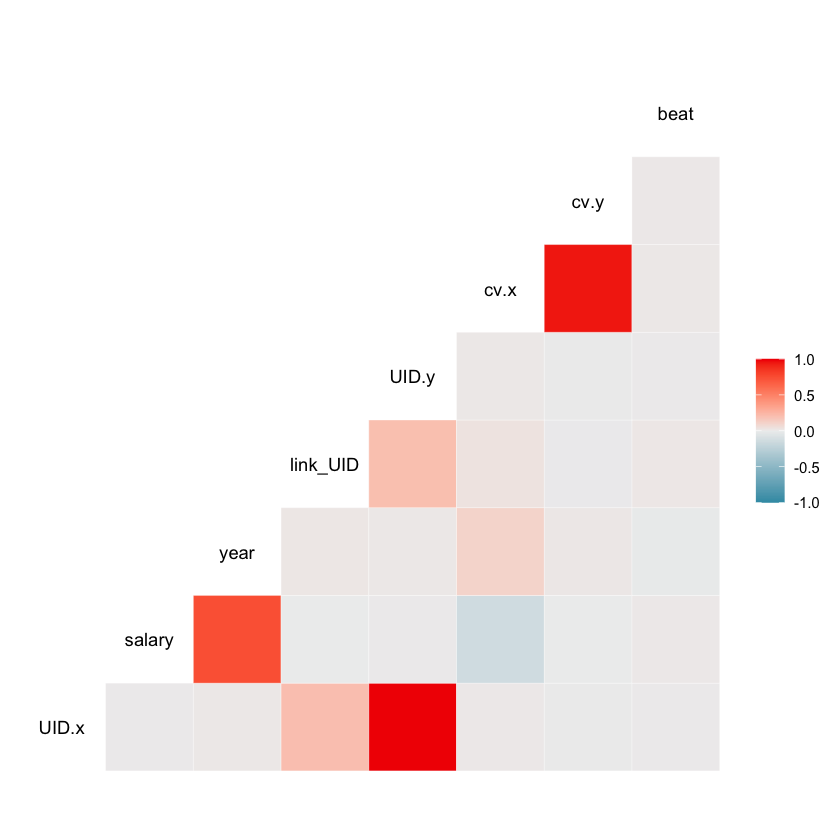

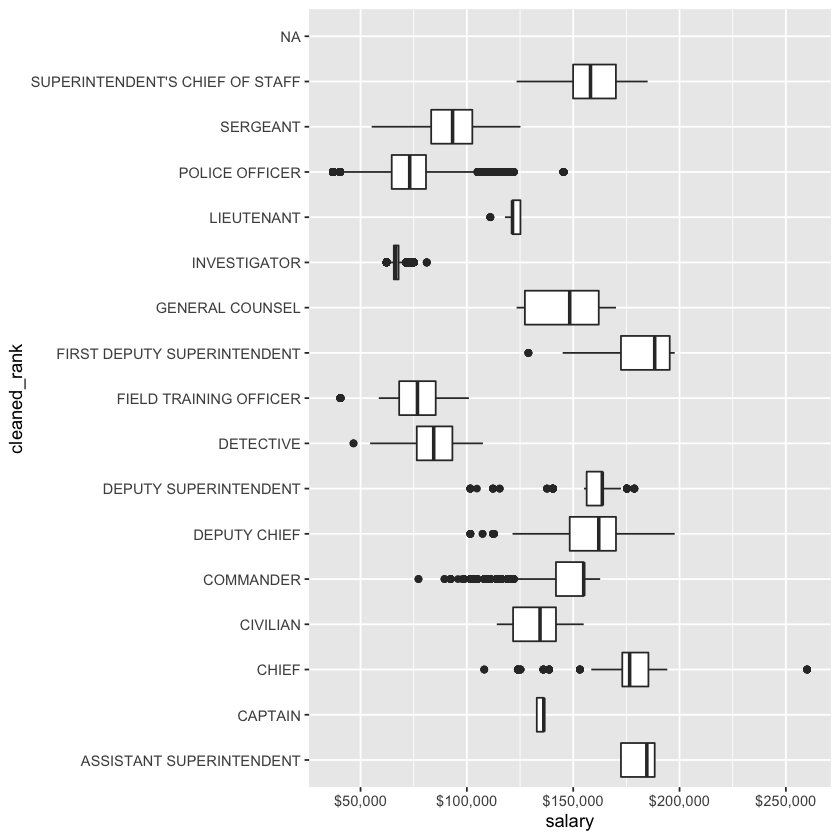

In [10]:
# Correlation Matrix
GGally::ggcorr(df_merged)

# Boxplot
ggplot(df_merged) + 
  aes(x = salary,
      y = cleaned_rank) +
  geom_boxplot() + 
  scale_x_continuous(labels = scales::label_dollar())

